# 03 · DNIT (SNV) — QA, Resumos e Mapas (NE)

Objetivo: consolidar os atributos do SNV (CSV atualizado) e usar as geometrias parciais (GPKG de diffs) para ilustrar mudanças recentes em corredores críticos (BR-101/116/232…), conectando com o case **Recife × Salvador**.

In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 140

BASE = Path.cwd().resolve().parent
CSV_SNV = BASE/"data/interim/dnit/snv_trechos_NE_2025-07_updated.csv"
GPKG_DIFFS = BASE/"data/processed/dnit/snv_NE_2025-07_partial_geom.gpkg"
GPKG_MUN = BASE/"data/interim/ibge/municipios_NE_2022.gpkg"
SUM_DIR = BASE/"data/processed/dnit/summaries"

print(BASE.resolve())

by_br_uf_csv = SUM_DIR/"snv_summary_BR_UF.csv"
by_uf_csv    = SUM_DIR/"snv_summary_UF.csv"
top_brs_csv  = SUM_DIR/"snv_top_brs_NE.csv"

C:\Users\Juan\magalu-cd-location


## 1) Carregar bases tratadas e resumos

In [10]:
df = pd.read_csv(CSV_SNV)
by_br_uf = pd.read_csv(by_br_uf_csv)
by_uf = pd.read_csv(by_uf_csv)
top_brs = pd.read_csv(top_brs_csv)
df.head(3), by_uf.head(3), top_brs.head(3)

(    id_trecho  br br_pad  uf     trecho_desc  localidade  km_ini  km_fim  \
 0  010BMA0360  10  BR-10  MA  Eixo Principal         NaN     0.0   340.0   
 1  010BMA0370  10  BR-10  MA  Eixo Principal  Imperatriz   340.0  1288.0   
 2  010BMA0390  10  BR-10  MA  Eixo Principal  Imperatriz  1288.0  1564.0   
 
    ext_km situacao        classe       sentido jurisdicao concessao data_ref  \
 0   340.0      PLA  Longitudinal  km_crescente    Federal       nao  2025-07   
 1   948.0      PAV  Longitudinal  km_crescente    Federal       nao  2025-07   
 2   276.0      PAV  Longitudinal  km_crescente    Federal       nao  2025-07   
 
   chave_trecho_hint  
 0        BR-10|MA|0  
 1      BR-10|MA|340  
 2     BR-10|MA|1288  ,
    uf  km_total  km_dup    km_pav  km_conc  pct_dup  pct_pav  pct_conc  \
 0  AL   11315.0     0.0   11315.0    308.0      0.0      1.0  0.027221   
 1  BA  126987.0     0.0  126987.0    175.0      0.0      1.0  0.001378   
 2  CE   37128.0     0.0   37128.0    103.0   

## 2) Indicadores principais (NE)

- Extensão total por UF
- % duplicada, % pavimentada, % concessão por UF
- Top corredores por extensão no NE (para destacar BR-101/116, etc.)

In [11]:
display(by_uf.sort_values("km_total", ascending=False).style.format({
    'km_total': '{:,.1f}', 'km_dup': '{:,.1f}', 'km_pav': '{:,.1f}', 'km_conc': '{:,.1f}',
    'pct_dup': '{:.1%}', 'pct_pav': '{:.1%}', 'pct_conc': '{:.1%}'
}))

display(top_brs.head(15))

AttributeError: The '.style' accessor requires jinja2

## 3) Mapas — diffs com geometria (amostras recentes)
Vamos carregar a camada `snv_diffs_geometry_NE` e sobrepor aos municípios do NE. Isso **não é a malha completa**, mas ajuda a ilustrar trechos com atualização recente em julho/2025.

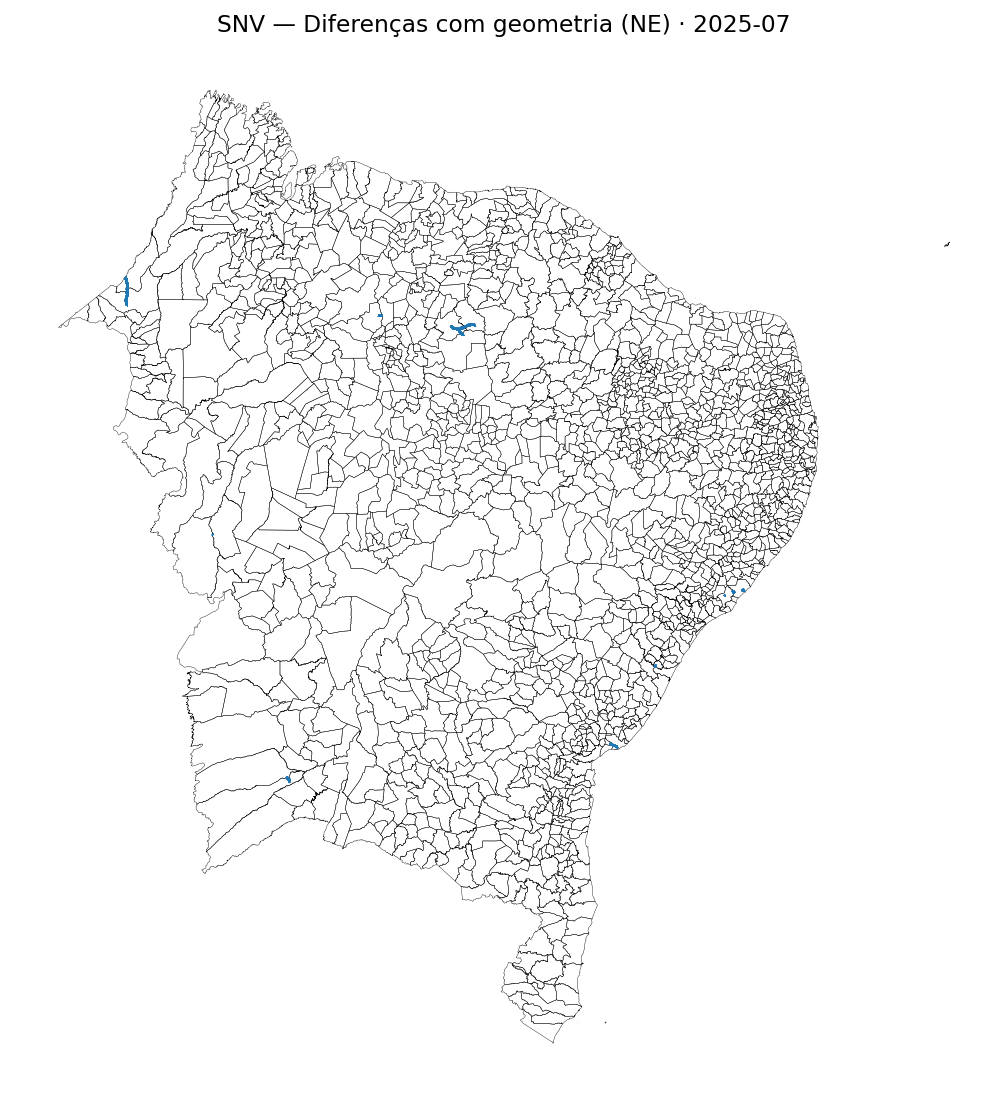

In [12]:
layers = ["snv_diffs_geometry_NE"]
gdf_mun = gpd.read_file(GPKG_MUN)
gdf_mun = gdf_mun.to_crs(4674)
gdf_diff = gpd.read_file(GPKG_DIFFS, layer=layers[0])
gdf_diff = gdf_diff.to_crs(4674)

fig, ax = plt.subplots(figsize=(8,8))
gdf_mun.boundary.plot(ax=ax, lw=0.2, color='black')
gdf_diff.plot(ax=ax, lw=1.2)
ax.set_title("SNV — Diferenças com geometria (NE) · 2025-07")
ax.set_axis_off()
plt.tight_layout()

## 4) Destaques para o case Recife × Salvador
A ideia aqui é pegar os **corredores mais relevantes** para a malha NE (ex.: BR-101, BR-116, BR-232) e cruzar com os resumos de **duplicação / pavimentação / concessão** por UF.

Para ganhar tração no pitch:
- BRs com maior extensão e **maior % duplicada** nas UFs próximas de Recife/Salvador reforçam **capacidade e segurança operacional**.
- Atualizações recentes (differences) nesses corredores próximos das capitais indicam **obras** que reduzem gargalos.
- Use essa leitura junto ao **SLA ponderado** e aos **scores de consumo** (IBGE) já calculados.

In [13]:
# Filtros de interesse (ajuste conforme a necessidade):
focus_brs = ["BR-101","BR-116","BR-232"]
near_uf_recife   = ["PE","PB","AL"]
near_uf_salvador = ["BA","SE","AL"]

focus_recife = by_br_uf[by_br_uf["br_pad"].isin(focus_brs) & by_br_uf["uf"].isin(near_uf_recife)]
focus_salvador = by_br_uf[by_br_uf["br_pad"].isin(focus_brs) & by_br_uf["uf"].isin(near_uf_salvador)]

display(focus_recife.sort_values(["br_pad","uf"]))
display(focus_salvador.sort_values(["br_pad","uf"]))

,br_pad,uf,km_total,km_dup,km_pav,km_conc,pct_dup,pct_pav,pct_conc,n_trechos
1,BR-101,AL,2564.0,0.0,2564.0,0.0,0.0,1.0,0.000000,27
3,BR-101,PB,1358.0,0.0,1358.0,0.0,0.0,1.0,0.000000,14
4,BR-101,PE,2963.0,0.0,2963.0,0.0,0.0,1.0,0.000000,32
18,BR-116,PB,134.0,0.0,134.0,0.0,0.0,1.0,0.000000,2
19,BR-116,PE,915.0,0.0,915.0,0.0,0.0,1.0,0.000000,5
40,BR-232,PE,5716.0,0.0,5716.0,1335.0,0.0,1.0,0.233555,41


,br_pad,uf,km_total,km_dup,km_pav,km_conc,pct_dup,pct_pav,pct_conc,n_trechos
1,BR-101,AL,2564.0,0.0,2564.0,0.0,0.0,1.0,0.00000,27
2,BR-101,BA,9674.0,0.0,9674.0,175.0,0.0,1.0,0.01809,64
6,BR-101,SE,2304.0,0.0,2304.0,0.0,0.0,1.0,0.00000,38
16,BR-116,BA,9968.0,0.0,9968.0,0.0,0.0,1.0,0.00000,63


## 5) Conectar com SLA ponderado e demanda (opcional)
Se você já tem `data/processed/osrm/sla_ponderado_topN_summary.csv` e o `consumo_municipal_NE_2021.csv`, faça um quadro síntese comparando **Recife vs Salvador**:

- SLA médio ponderado (já calculado).
- % de km duplicada/pavimentada/concedida nos corredores de maior uso dos *ODs*.
- Observações qualitativas a partir das **diferenças com geometria** (obras recentes) próximas a cada capital.